In [1]:
from PIL import Image
from torchvision import transforms

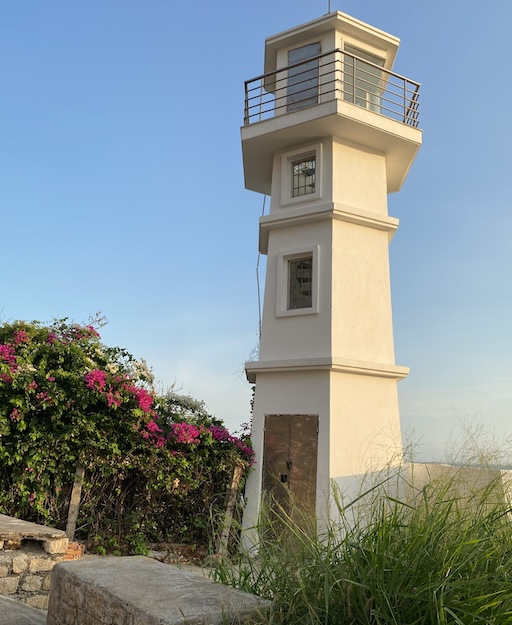

In [2]:
image = Image.open('image.jpg')
image

# 1. Rotate

In [3]:
transform = transforms.RandomRotation(degrees=180)
transform

RandomRotation(degrees=[-180.0, 180.0], interpolation=nearest, expand=False, fill=0)

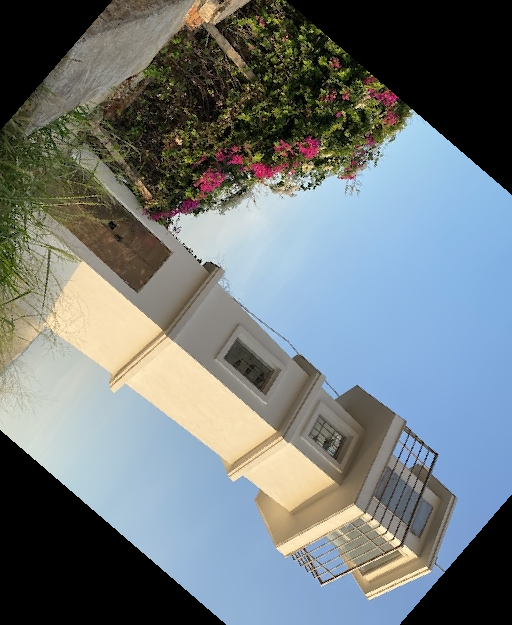

In [4]:
transform(image)

# 2. Flip

In [5]:
transform = transforms.RandomHorizontalFlip(p=1)
transform

RandomHorizontalFlip(p=1)

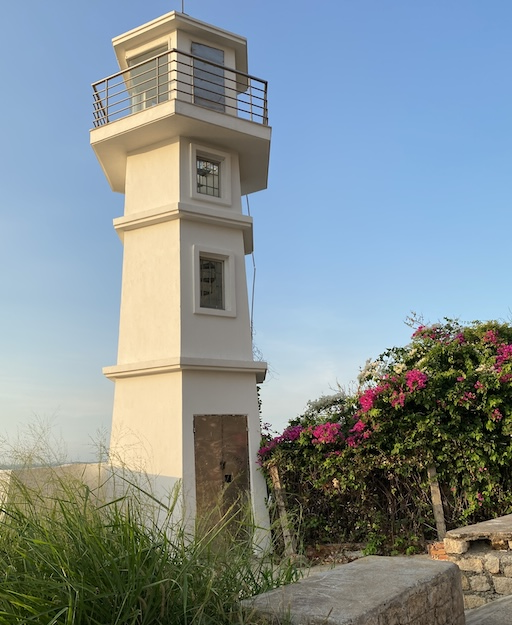

In [6]:
transform(image)

In [7]:
transform = transforms.RandomVerticalFlip(p=1)
transform

RandomVerticalFlip(p=1)

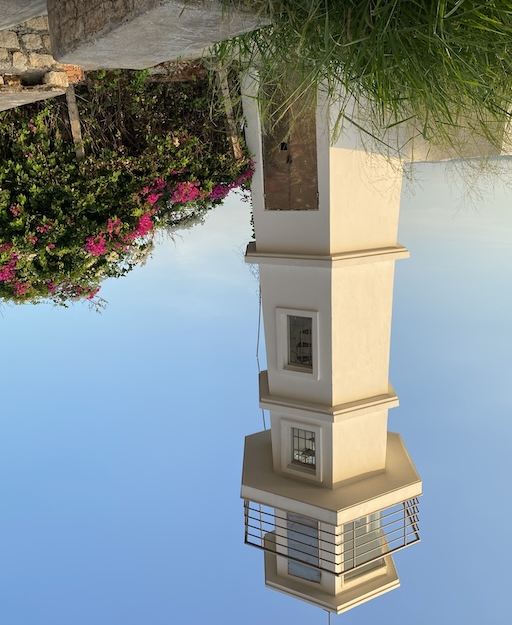

In [8]:
transform(image)

# 3. Resize

In [9]:
transform = transforms.Resize(size=128)
transform

Resize(size=128, interpolation=bilinear, max_size=None, antialias=True)

In [10]:
image.size

(512, 625)

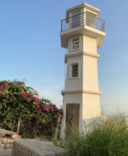

In [11]:
resized = transform(image)
resized

In [12]:
resized.size

(128, 156)

In [13]:
transform = transforms.Resize(size=(128, 256))
transform

Resize(size=(128, 256), interpolation=bilinear, max_size=None, antialias=True)

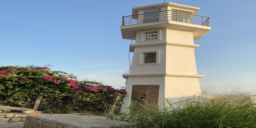

In [14]:
resized = transform(image)
resized

In [15]:
resized.size

(256, 128)

In [16]:
# Only support v2
# transform = v2.ScaleJitter()

In [17]:
# Only support v2
# transform = v2.RandomShortestSize()

In [18]:
# Only support v2
# transform = v2.RandomResize()

# 4. Crop

In [19]:
transform = transforms.RandomCrop(size=128)

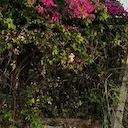

In [20]:
transform(image)

In [21]:
transform = transforms.RandomCrop(size=(60, 120))

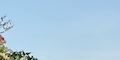

In [22]:
transform(image)

In [23]:
transform = transforms.CenterCrop(size=(60, 120))

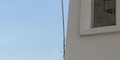

In [24]:
transform(image)

In [25]:
transform = transforms.FiveCrop(size=(60, 120))

In [26]:
five_crops = transform(image)
five_crops

(<PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>)

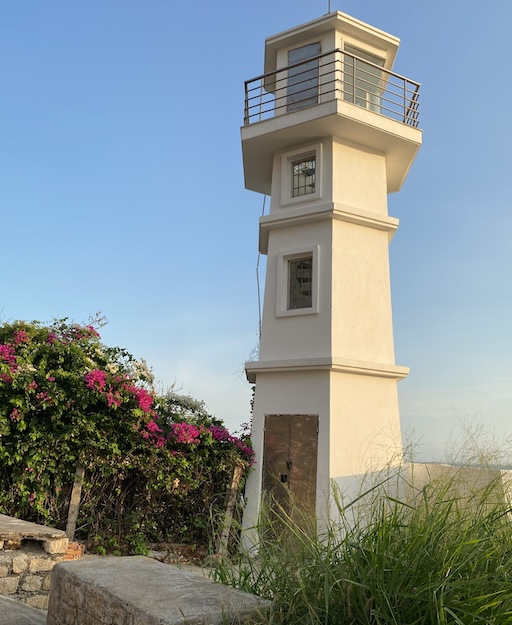

In [27]:
image

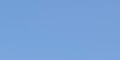

In [28]:
five_crops[0]

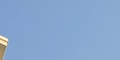

In [29]:
five_crops[1]

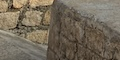

In [30]:
five_crops[2]

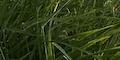

In [31]:
five_crops[3]

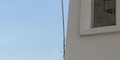

In [32]:
five_crops[4]

In [33]:
transform = transforms.TenCrop(size=(60, 120))

In [34]:
ten_crops = transform(image)
ten_crops

(<PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>,
 <PIL.Image.Image image mode=RGB size=120x60>)

In [35]:
transform = transforms.RandomResizedCrop(size=128)
transform

RandomResizedCrop(size=(128, 128), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)

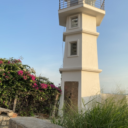

In [36]:
transform(image)

# 5. Brightness, contrast, saturation, hue

In [37]:
brightness_transform = transforms.ColorJitter(brightness=3)
brightness_transform

ColorJitter(brightness=(0.0, 4.0), contrast=None, saturation=None, hue=None)

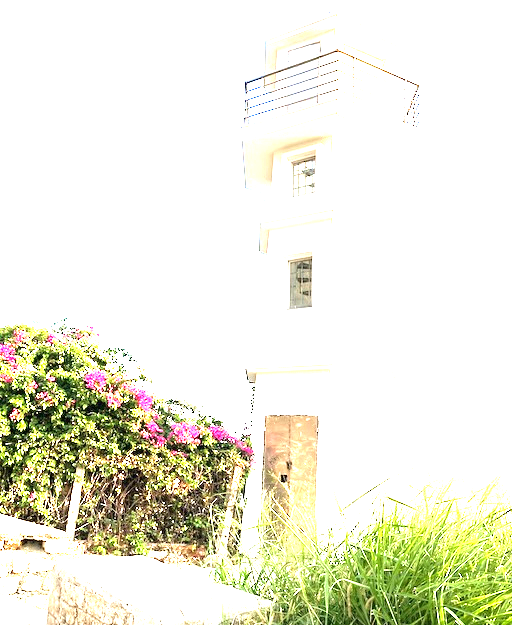

In [38]:
brightness_transform(image)

In [39]:
contrast_transform = transforms.ColorJitter(contrast=3)
contrast_transform

ColorJitter(brightness=None, contrast=(0.0, 4.0), saturation=None, hue=None)

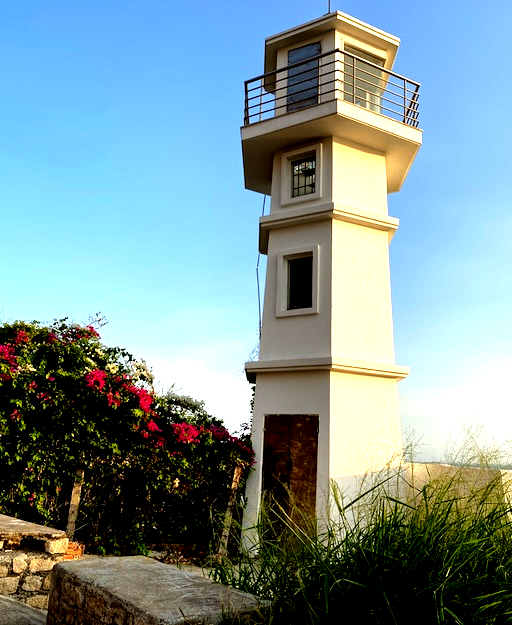

In [40]:
contrast_transform(image)

In [41]:
saturation_transform = transforms.ColorJitter(saturation=3)
saturation_transform

ColorJitter(brightness=None, contrast=None, saturation=(0.0, 4.0), hue=None)

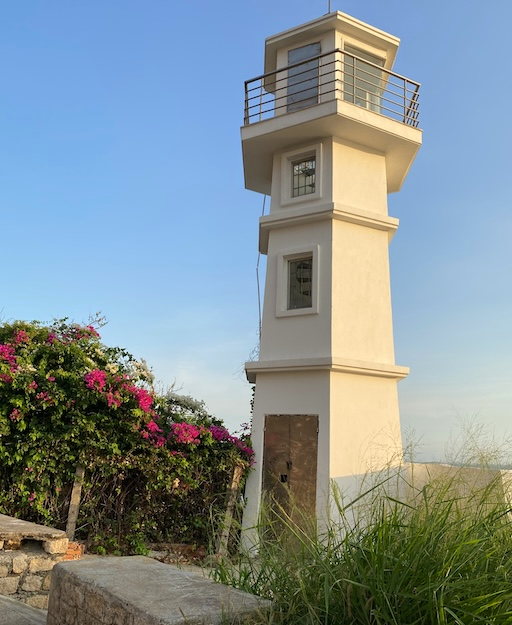

In [42]:
saturation_transform(image)

In [43]:
hue_transform = transforms.ColorJitter(hue=0.5)
hue_transform

ColorJitter(brightness=None, contrast=None, saturation=None, hue=(-0.5, 0.5))

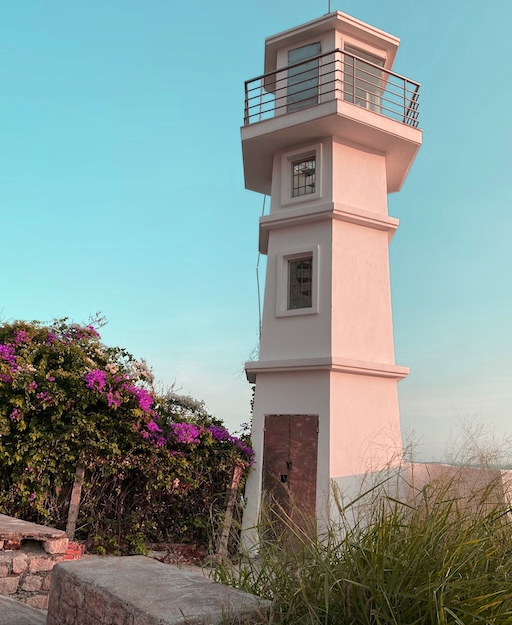

In [44]:
hue_transform(image)

In [45]:
transform = transforms.ColorJitter(brightness=3, contrast=3, saturation=3, hue=0.5)
transform

ColorJitter(brightness=(0.0, 4.0), contrast=(0.0, 4.0), saturation=(0.0, 4.0), hue=(-0.5, 0.5))

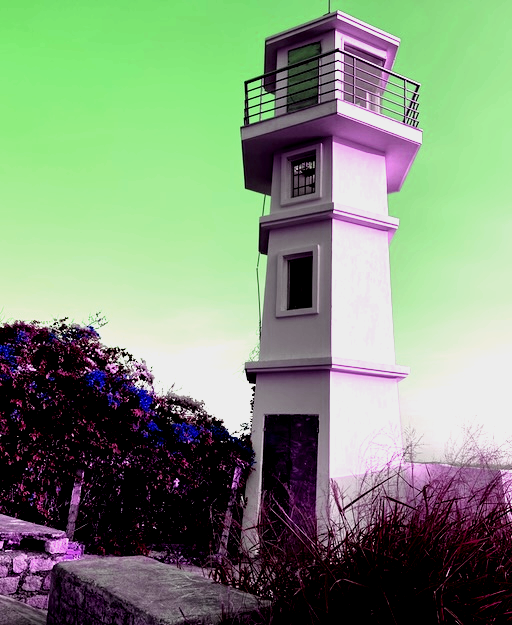

In [46]:
transform(image)

In [47]:
# transforms.Grayscale()
# transforms.RandomGrayscale()

# 6. Blur

In [48]:
transform = transforms.GaussianBlur(kernel_size=11, sigma=7)
transform

GaussianBlur(kernel_size=(11, 11), sigma=(7, 7))

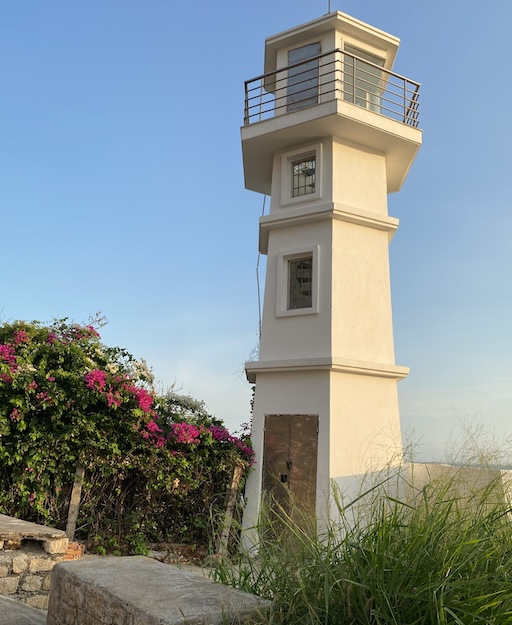

In [49]:
image

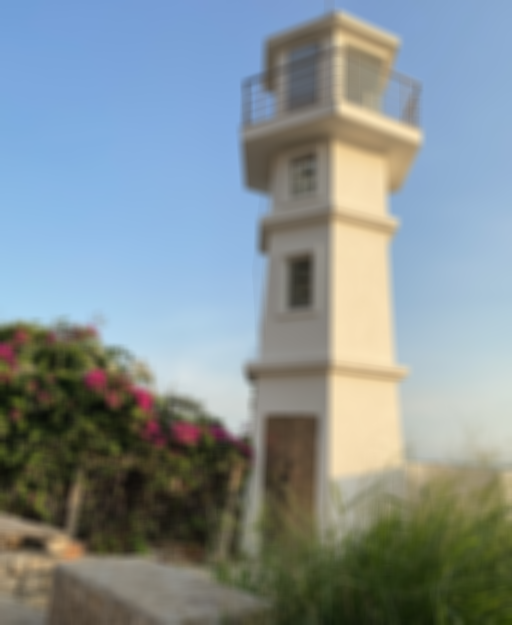

In [50]:
transform(image)

# 7. Compose

In [51]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(size=(224, 224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

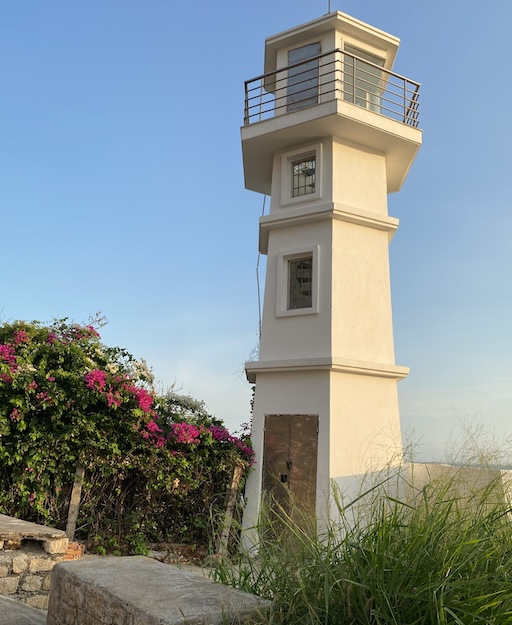

In [52]:
image

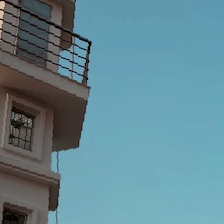

In [53]:
transform(image)

In [54]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(size=(224, 224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [55]:
transform(image)

tensor([[[ 1.2899,  1.3242,  1.3242,  ...,  0.4508,  0.4508,  0.4508],
         [ 1.2899,  1.2899,  1.2899,  ...,  0.4679,  0.4508,  0.5022],
         [ 1.3242,  1.2728,  1.2728,  ...,  0.4679,  0.4508,  0.5022],
         ...,
         [-0.0972,  0.0569,  0.2111,  ..., -0.1999, -0.1999, -0.3883],
         [-0.2513,  0.0227,  0.2111,  ..., -0.8335, -1.1760, -0.6109],
         [-0.0972, -0.1314,  0.0569,  ..., -1.1760, -1.0219, -0.5424]],

        [[ 1.8333,  1.8508,  1.8508,  ...,  1.1856,  1.1856,  1.1856],
         [ 1.8333,  1.8333,  1.8333,  ...,  1.2031,  1.1856,  1.1856],
         [ 1.8508,  1.8158,  1.8158,  ...,  1.1856,  1.1856,  1.2031],
         ...,
         [ 0.0651,  0.1527,  0.3102,  ..., -0.0399, -0.0399, -0.2325],
         [-0.0749,  0.1877,  0.3102,  ..., -0.6001, -0.9328, -0.4601],
         [ 0.1001,  0.0476,  0.2402,  ..., -0.9503, -0.8102, -0.3901]],

        [[ 2.2043,  2.2391,  2.2391,  ...,  1.8905,  1.8905,  1.8557],
         [ 2.2043,  2.2043,  2.2043,  ...,  1